과제 내용 : 기계 독해 (LSTM 기반 영영화 긍/부정 결과 데이터셋 결과 기반 예측.)


#Mission! : 

vocab tockenizer, batch 크기 등과 

LSTM 모델의 하이퍼파라미터를 튜닝해서 최대한 

Accuracy를 올려보세요!

In [1]:
pip install torchtext==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.5/735.5 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.14.1
    Uninstalling torchtext-0.14.1:
      Successfully uninstalled torchtext-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1+cu116 requires torch==1.13.1, but you have torch 1.8.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.8.0 which is incompatible.


In [2]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

In [3]:
import torch
import torch.nn as nn
import urllib.request
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

데이터 깃헙에서 받아주겠습니다. 대표적인 영어데이터인 IMDB 리뷰데이터입니다.

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7fc103f17400>)

In [5]:
df = pd.read_csv('IMDb_Reviews.csv', encoding='utf-8')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


첫 열은 영화 리뷰로, 둘째 열은 긍정/부정을 나타내는 열입니다. (긍정 1 부정 0)

In [6]:
print('전체 샘플의 개수 : {}'.format(len(df)))

전체 샘플의 개수 : 50000


샘플 개수 50000개, 4 대 1 로 나눠주겠습니다.

In [7]:
train_df = df[:20000]
val_df=df[20000:30000]
test_df = df[30000:]

In [8]:
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

여러분의 커스텀 데이터셋을 만들어보세요. 아래 있는 코드를 쓰셔도 좋고 개별 구글링 진행하셔도 좋습니다.

https://towardsdatascience.com/how-to-use-datasets-and-dataloader-in-pytorch-for-custom-text-data-270eed7f7c00

Initialise the CustomTextDataset class


In [ ]:
import numpy as np

In [ ]:
# define data and class labels
text = train_datapipe.review
labels = train_datapipe.sentiment

# DataLoader
(dataset, batch_size=1, shuffle=False, sampler=None,  batch_sampler=None, num_workers=0, collate_fn=None,
pin_memory=False, drop_last=False, timeout=0,
worker_init_fn=None)

In [9]:
from torchtext.legacy import data # torchtext.data 임포트

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

In [10]:
from torchtext.legacy.data import TabularDataset

In [11]:
train_data, val_data, test_data = TabularDataset.splits(
        path='.', train='train_data.csv', validation='val_data.csv',test='test_data.csv', format='csv',
        fields=[('text', TEXT), ('label', LABEL)], skip_header=True)

In [12]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('검증 샘플의 개수 : {}'.format(len(val_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 20000
검증 샘플의 개수 : 10000
테스트 샘플의 개수 : 20000


In [13]:
print(vars(train_data[0]))

{'text': ['my', 'family', 'and', 'i', 'normally', 'do', 'not', 'watch', 'local', 'movies', 'for', 'the', 'simple', 'reason', 'that', 'they', 'are', 'poorly', 'made,', 'they', 'lack', 'the', 'depth,', 'and', 'just', 'not', 'worth', 'our', 'time.<br', '/><br', '/>the', 'trailer', 'of', '"nasaan', 'ka', 'man"', 'caught', 'my', 'attention,', 'my', 'daughter', 'in', "law's", 'and', "daughter's", 'so', 'we', 'took', 'time', 'out', 'to', 'watch', 'it', 'this', 'afternoon.', 'the', 'movie', 'exceeded', 'our', 'expectations.', 'the', 'cinematography', 'was', 'very', 'good,', 'the', 'story', 'beautiful', 'and', 'the', 'acting', 'awesome.', 'jericho', 'rosales', 'was', 'really', 'very', 'good,', "so's", 'claudine', 'barretto.', 'the', 'fact', 'that', 'i', 'despised', 'diether', 'ocampo', 'proves', 'he', 'was', 'effective', 'at', 'his', 'role.', 'i', 'have', 'never', 'been', 'this', 'touched,', 'moved', 'and', 'affected', 'by', 'a', 'local', 'movie', 'before.', 'imagine', 'a', 'cynic', 'like', 'me

In [14]:
# 필드 구성 확인.
print(train_data.fields.items())

dict_items([('text', <torchtext.legacy.data.field.Field object at 0x7fc103d4af10>), ('label', <torchtext.legacy.data.field.Field object at 0x7fc103d4a8e0>)])


In [15]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)

In [16]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 10002


In [17]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7fc103999ca0>>, {'<unk>': 0, '<pad>': 1, 'the': 2, 'a': 3, 'and': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, '/><br': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'but': 18, 'on': 19, 'movie': 20, 'his': 21, 'not': 22, 'are': 23, 'you': 24, 'film': 25, 'have': 26, 'he': 27, 'be': 28, 'at': 29, 'one': 30, 'by': 31, 'an': 32, 'they': 33, 'from': 34, 'who': 35, 'all': 36, 'like': 37, 'so': 38, 'just': 39, 'or': 40, 'has': 41, 'about': 42, 'if': 43, "it's": 44, 'her': 45, 'some': 46, 'out': 47, 'what': 48, 'very': 49, 'when': 50, 'there': 51, 'more': 52, 'would': 53, 'even': 54, 'my': 55, 'good': 56, 'she': 57, 'their': 58, 'only': 59, 'no': 60, 'really': 61, 'had': 62, 'can': 63, 'up': 64, 'which': 65, 'see': 66, 'were': 67, 'than': 68, 'we': 69, '-': 70, 'into': 71, 'been': 72, 'much': 73, 'get': 74, 'will': 75, 'because': 76, 'story': 77, 'most': 78, 'how': 7

In [18]:
from torchtext.legacy.data import Iterator

In [19]:
batch_size = 5

In [20]:
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
val_loader = Iterator(dataset=val_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [21]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('검증 데이터의 미니 배치 수 : {}'.format(len(val_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 4000
검증 데이터의 미니 배치 수 : 2000
테스트 데이터의 미니 배치 수 : 4000


In [22]:
batch = next(iter(train_loader)) # 첫번째 미니배치

In [23]:
print(type(batch))

<class 'torchtext.legacy.data.batch.Batch'>


In [24]:
print(batch.text)

tensor([[  80,   68,    2,   88,  842,   31,    2, 3905,  672, 5857,    0,    8,
            2, 1003,  941,   10,   25,    7,    3,  302],
        [   9,  306,    2,  362,    0,    0,    4,   14,  267, 1020,    6,  298,
            2,  113,   28,    0,   12,    2,   20,    7],
        [ 146,  167,    6, 8959, 1113,    4,   43,   10,    4,    0,   23,   90,
            0,   97, 7164,    7,   73,   52,    3, 2406],
        [   9,   39, 2111,  148,   10,   25,    4, 7420,   14,   12,  598,  158,
            2,   59,  169,   12,  708,   86,  148,   14],
        [   8, 2187,   10,   20,    7,    3,    0,    5, 1576,    0,   13,    0,
            7,  732,    2,   78,  670, 2419,   25, 5104]])


In [25]:
batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.text[0]) # 첫번째 미니배치 중 첫번째 샘플

tensor([  48,   32, 4003,    0,   11,   91,   26,   72,  140,   52,   18,   60,
        2695,  176,    6,   26,  849,   71,    2,  268])


vocab tockenizer 설명 코랩랩

https://colab.research.google.com/github/PyTorchKorea/tutorials-kr/blob/master/docs/_downloads/b5fa995b1432ebc93ea7bfe7ec9daed1/text_sentiment_ngrams_tutorial.ipynb#scrollTo=qUEEK7gmuxuC

# LSTM 모델 구성

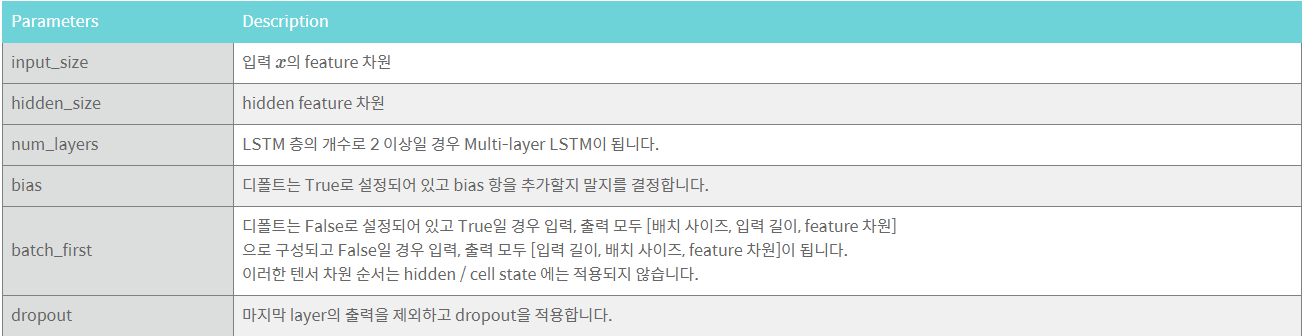

In [62]:
from torch.autograd import Variable
import torch.nn.functional as F
import os

In [63]:
class BasicLSTM(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes):
        super(BasicLSTM, self).__init__()
        print("Building Basic LSTM model...")

        
        self.n_layers = n_layers 
        #n_vocab : Vocab 안에 있는 단어의 개수, embed_dim : 임베딩 된 단어 텐서가 갖는 차원 값(dimension)
        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.hidden_dim = hidden_dim
#---------------------------------------------- 여기 밑부터 작성해주세요~-------------------------------------------------
        #앞에서 정의한 하이퍼 파라미터를 넣어 LSTM 정의
        self.lstm = nn.LSTM(input_size=embed_dim, 
                            hidden_size=self.hidden_dim, 
                            num_layers=self.n_layers,
                            batch_first=True)
        
        #Input: LSTM의 hidden state vector(context), Output : Class probability vector
        self.out = nn.Linear(self.hidden_dim, n_classes)
#----------------------------------------------여기까지-------------------------------------------------

    def forward(self, x):
        # Input data: 한 batch 내 모든 영화 평가 데이터
        
        x = self.embed(x)# 영화 평 임베딩

        # 초기 hidden, cell state vector를 zero vector로 생성
        h_0 = Variable(torch.zeros(self.n_layers, x.size(0), self.hidden_dim)).to(DEVICE)
        c_0 = Variable(torch.zeros(self.n_layers, x.size(0), self.hidden_dim)).to(DEVICE)
#------------------------------------------------여기 밑부터 작성해주세요-------------------------------------------------------------
        output, (h_t, c_t) = self.lstm(x, (h_0, c_0)) 
        #print(h_t.shape)
        #(1,64,h) ==> 64 batch-size,  h hidden_dimmension

        # 영화 리뷰 배열들을 압축한 hidden state vector
        # (batch_size, hidden_dim)형태의 텐서 추출
        h_t = h_t.view(-1, self.hidden_dim)

#-------------------------------------------------여기까지---------------------------------------------------------
        # linear layer의 입력으로 주고, 각 클래스 별 결과 logit을 생성.
        logit = self.out(h_t)  # [b, h] -> [b, o]
        return logit


In [64]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        optimizer.zero_grad()# 매번 기울기를 새로 계산하기 위해서 zero 로 초기화
        logit = model(x)#모델의 예측값 logit 계산
        #print(y)
        loss = F.cross_entropy(logit, y)# logit과 실제 label간의 오차를 구하고 기울기 계산
        loss.backward()
        optimizer.step()

In [65]:
def evaluate(model, val_iter):
    """evaluate model"""                   
    model.eval()
    corrects, total_loss = 0, 0
    for batch in val_iter:# Validation 데이터셋에 대하여 
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction='sum')
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
    #전체 validation 셋에 대한 평균 loss와 accuracy를 구하는 과정
    size = len(val_iter.dataset)
    avg_loss = total_loss / size
    avg_accuracy = 100.0 * corrects / size
    return avg_loss, avg_accuracy

참고 : __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes):

In [66]:
vocab_size=len(TEXT.vocab)
n_classes=2
lr=0.001

model = BasicLSTM(1, 32, vocab_size, 128, n_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Building Basic LSTM model...


In [67]:
model

BasicLSTM(
  (embed): Embedding(10002, 128)
  (lstm): LSTM(128, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=2, bias=True)
)

In [68]:
EPOCHS=9
train_iter=train_loader
val_iter=val_loader
test_iter=test_loader

best_val_loss = None
for e in range(1, EPOCHS+1):
    train(model, optimizer, train_iter)
    val_loss, val_accuracy = evaluate(model, val_iter)

    print("[이폭: %d] 검증 오차:%5.2f | 검증 정확도:%5.2f" % (e, val_loss, val_accuracy))
    
    # 검증 오차가 가장 적은 최적의 모델을 저장
    if not best_val_loss or val_loss < best_val_loss:
        if not os.path.isdir("snapshot"):
            os.makedirs("snapshot")
        torch.save(model.state_dict(), './snapshot/txtclassification.pt')
        best_val_loss = val_loss

[이폭: 1] 검증 오차: 0.63 | 검증 정확도:64.16
[이폭: 2] 검증 오차: 0.63 | 검증 정확도:64.83
[이폭: 3] 검증 오차: 0.66 | 검증 정확도:67.65
[이폭: 4] 검증 오차: 0.74 | 검증 정확도:66.81
[이폭: 5] 검증 오차: 0.92 | 검증 정확도:66.61
[이폭: 6] 검증 오차: 1.07 | 검증 정확도:66.91
[이폭: 7] 검증 오차: 1.24 | 검증 정확도:66.21
[이폭: 8] 검증 오차: 1.51 | 검증 정확도:65.66
[이폭: 9] 검증 오차: 1.64 | 검증 정확도:66.24


In [69]:
model.load_state_dict(torch.load('./snapshot/txtclassification.pt'))
test_loss, test_acc = evaluate(model, test_loader)
print('테스트 오차: %5.2f | 테스트 정확도: %5.2f' % (test_loss, test_acc))

테스트 오차:  0.62 | 테스트 정확도: 65.56
